# English Language Learning Ability Prediction Model

## Summary

--TO BE ADDED  the PROJECT SUMMARY INTRO PART

## Introduction 

### Background

-- TO BE ADDED provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

### Research Question

Can we predict an individual's English proficiency score based on factors such as age, education, and language background?

### Dataset

identify and describe the dataset that was used to answer the question

## Methods and Results

TO BE ADDED describe in written english the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.

Link to the dataset: [https://osf.io/pyb8s/wiki/home/]

Data Dictionary Summary Below for reference during EDA ** CAN BE DELETED LATER **


- **id:** Unique subject ID
- **date:** Date at the start of the experiment
- **time:** Time at the start of the experiment
- **gender:** Gender
- **age:** Age
- **natlangs:** List of subject's native languages
- **primelangs:** List of subject's primary language now
- **dyslexia:** Did the subject report difficulty with reading?
- **psychiatric:** Did the subject report any psychiatric disorders?
- **education:** Highest level of education
- **tests:** N/A
- **Eng_start:** Age at the start of English learning
- **Eng_country_yrs:** Number of years living in an English-speaking country
- **house_Eng:** Does the subject live with any native English speakers?
- **dictionary:** Did the subject report using a dictionary to complete the experiment?
- **already_participated:** Subject reported prior participation in the experiment
- **countries:** Countries lived in
- **currcountry:** Country currently lived in
- **US_region:** Regions of the USA lived in
- **UK_region:** Regions of the UK lived in
- **Can_region:** Regions of Canada lived in
- **Ebonics:** Speaker of Ebonics?
- **Ir_region:** County of Ireland lived in
- **UK_constituency:** Constituency of the UK lived in
- **nat_Eng:** Native speaker of English
- **prime_Eng:** Do not use
- **speaker_cat:** N/A
- **type:** N/A
- **lived_Eng_per:** Percentage of years speaking English that lived in an English-speaking country.
- **Eng_little:** Values are monoeng (native speaker of English only), bileng (native speaker of English + at least one other lang), lot (immersion learner), little (non-immersion learner).
- **correct:** Percentage of critical items correct
- **elogit:** Elogit of correct
- **natcon:** N/A
- **primeeng:** N/A
- **edtype:** N/An: N/A
primeeng: N/A
edtype: N/Aelogit elogit of correct

natcon N/A

primeeng N/A

edtype N/A

#### Loading Packages and Functions

In [1]:
import pandas as pd
import numpy as num
import altair as alt
import vegafusion
import matplotlib
from sklearn.model_selection import train_test_split

#### Reading Data

In [34]:
# Reading the dataset
dataset = pd.read_csv("https://osf.io/download/g72pq/", sep=',', on_bad_lines='skip', low_memory=False)
dataset.head()

,Unnamed: 0,id,date,time,gender,age,natlangs,primelangs,dyslexia,psychiatric,...,q34_6,q34_8,q35_1,q35_2,q35_4,q35_5,q35_7,q35_8,correct,elogit
0,1,2.0,2014-05-29,01:00:55,male,31,English,English,0,0,...,1,1,1,1,1,1,1,1,0.978947,3.621671
1,2,3.0,2014-05-29,01:01:03,male,30,English,English,0,1,...,1,1,1,1,1,1,1,1,1.000000,5.252273
2,3,3.0,2014-05-29,01:01:03,male,30,English,English,0,1,...,1,1,1,1,1,1,1,1,1.000000,5.252273
3,4,4.0,2014-05-29,01:01:13,male,19,English,English,0,0,...,1,1,1,1,1,0,1,1,0.905263,2.208853
4,5,5.0,2014-05-29,01:01:19,male,20,"Chinese/Mandarin, English","Chinese/Mandarin, English",0,0,...,1,1,1,1,1,0,1,1,0.947368,2.800602


#### Split the Dataset into Train/Test

Since we have already looked at the dataset from the source, we will be dropping some columns that increase the dimensionality of the dataset and are redundant Question level columns in the dataset that will not be used whatsoever in our dataset, we are choosing to drop those columns early on before we visualise our data and examine it for the modelling phase that will follow

Additionally since we are interested in how students perform, we do not need to consider at what time or date they took their tests hence we will drop the first 4 columns of the dataset.

In [35]:
# Creating a list of columns related to each question level data to drop
columns_to_drop = [col for col in dataset.columns if col.startswith('q')]

# Dropping the question columns from the DataFrame
dataset = dataset.drop(columns_to_drop, axis=1)

# Dropping the irrelevant columns from the DataFrame ( contain same values and do not relate to the question
dataset = dataset.drop("tests", axis=1)

# Dropping columns for ID, and index columns and additionally since we are interested in how
dataset = dataset.iloc[:,4:]

In [36]:
# Splitting the DataFrame
train_df, test_df = train_test_split(dataset, test_size=0.3, random_state=123)

train_df.head()

,gender,age,natlangs,primelangs,dyslexia,psychiatric,education,Eng_start,Eng_country_yrs,house_Eng,...,Ir_region,UK_constituency,nat_Eng,prime_Eng,speaker_cat,type,Lived_Eng_per,Eng_little,correct,elogit
413443,female,35,Hungarian,"French , Hungarian",0,0,Some Undergrad (higher ed),8,0.0,0.0,...,NaN,NaN,0,0,late,Hungarian,0.0,little,0.926316,2.468100
385270,male,24,Polish,Polish,0,0,Graduate Degree,16,0.0,0.0,...,NaN,NaN,0,0,late,Polish,0.0,little,0.726316,0.964182
444091,female,29,English,"English, Japanese",0,1,Undergraduate Degree (3-5 years higher ed),0,NaN,NaN,...,NaN,NaN,1,1,native,NaN,NaN,monoeng,0.947368,2.800602
21235,male,49,Finnish,Finnish,0,0,Undergraduate Degree (3-5 years higher ed),9,0.0,0.0,...,NaN,NaN,0,0,late,Finnish,0.0,little,0.968421,3.274446
39273,male,23,"Chinese/Hokkien, Chinese/Mandarin, English","Chinese/Hokkien, English",0,0,Graduate Degree,0,NaN,NaN,...,NaN,NaN,1,1,native,NaN,NaN,bileng,0.768421,1.183770


#### EDA

Some Columns are redundant and binary versions of another column, we will exclude these from our dataset to start off, if needed we can switch to the binary version of the column later using our preprocessor

# Replacing NaN values for the numeric columns with zero
df_numeric_filled = train_df.select_dtypes(include='number').fillna(0)
train_df.update(df_numeric_filled)


# number of NaN values in each column
nan_counts = train_df.isna().sum()
print(nan_counts)

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468648 entries, 413443 to 277869
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                468648 non-null  object 
 1   age                   468648 non-null  int64  
 2   natlangs              463116 non-null  object 
 3   primelangs            463248 non-null  object 
 4   dyslexia              468648 non-null  int64  
 5   psychiatric           468648 non-null  int64  
 6   education             468648 non-null  object 
 7   Eng_start             468648 non-null  int64  
 8   Eng_country_yrs       265660 non-null  float64
 9   house_Eng             265660 non-null  float64
 10  dictionary            468648 non-null  int64  
 11  already_participated  468648 non-null  int64  
 12  countries             447895 non-null  object 
 13  currcountry           444878 non-null  object 
 14  US_region             118240 non-null  object 
 15  

In [41]:
train_df.describe(include="all")

,gender,age,natlangs,primelangs,dyslexia,psychiatric,education,Eng_start,Eng_country_yrs,house_Eng,...,Ir_region,UK_constituency,nat_Eng,prime_Eng,speaker_cat,type,Lived_Eng_per,Eng_little,correct,elogit
count,468648,468648.000000,463116,463248,468648.0,468648.000000,468648,468648.000000,265660.000000,265660.000000,...,8326,65350,468648.000000,468648.000000,468648,278283,257722.000000,390793,468648.000000,468648.000000
unique,3,NaN,4974,4395,NaN,NaN,72,NaN,NaN,NaN,...,276,5718,NaN,NaN,3,54,NaN,4,NaN,NaN
top,female,NaN,English,English,NaN,NaN,Graduate Degree,NaN,NaN,NaN,...,none,none,NaN,NaN,native,United States,NaN,little,NaN,NaN
freq,249700,NaN,175278,215599,NaN,NaN,164336,NaN,NaN,NaN,...,3594,24850,NaN,NaN,209620,60528,NaN,186418,NaN,NaN
mean,NaN,29.973707,NaN,NaN,0.0,0.030891,NaN,5.177180,4.436272,0.194245,...,NaN,NaN,0.436353,0.434785,NaN,NaN,0.146462,NaN,0.937720,3.028704
std,NaN,11.249968,NaN,NaN,0.0,0.173023,NaN,5.693339,10.186066,0.395619,...,NaN,NaN,0.495933,0.495729,NaN,NaN,0.299970,NaN,0.060893,1.012147
min,NaN,7.000000,NaN,NaN,0.0,0.000000,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.073684,-2.468100
25%,NaN,22.000000,NaN,NaN,0.0,0.000000,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.915789,2.331573
50%,NaN,27.000000,NaN,NaN,0.0,0.000000,NaN,4.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.957895,3.012262
75%,NaN,35.000000,NaN,NaN,0.0,0.000000,NaN,10.000000,2.000000,0.000000,...,NaN,NaN,1.000000,1.000000,NaN,NaN,0.095238,NaN,0.978947,3.621671


#### Numeric Looking Columns Distribution

['age', 'dyslexia', 'psychiatric', 'Eng_start', 'Eng_country_yrs', 'house_Eng', 'dictionary', 'already_participated', 'nat_Eng', 'prime_Eng', 'Lived_Eng_per', 'correct', 'elogit']


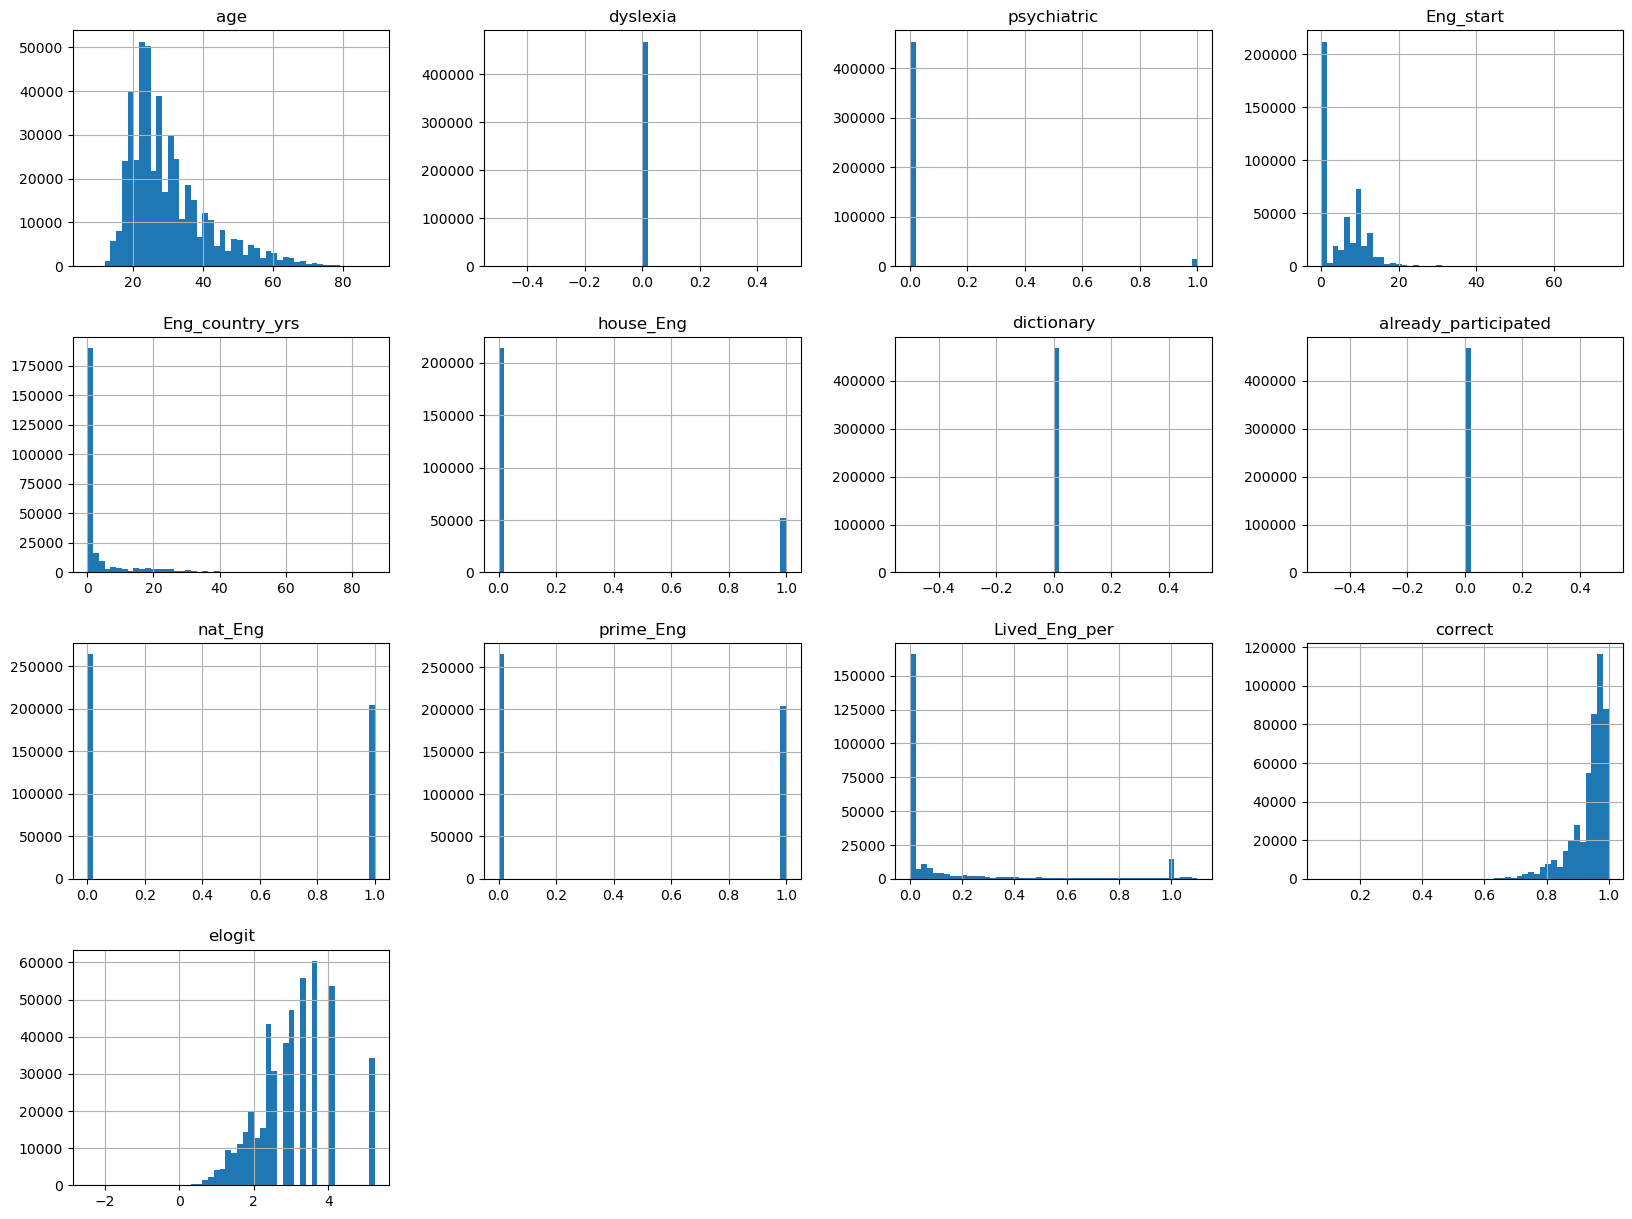

In [43]:
alt.data_transformers.enable('vegafusion')

numeric_cols = train_df.select_dtypes(include='number').columns.tolist()
print(numeric_cols)
train_df.hist(bins=50, figsize=(20, 15));

#### Correlation matrix

In [44]:
correlation_matrix = train_df.corr(numeric_only=True).style.background_gradient(cmap='seismic')
correlation_matrix

C:\Users\salva\miniconda3\envs\571\lib\site-packages\pandas\io\formats\style.py:3819: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\salva\miniconda3\envs\571\lib\site-packages\pandas\io\formats\style.py:3820: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,age,dyslexia,psychiatric,Eng_start,Eng_country_yrs,house_Eng,dictionary,already_participated,nat_Eng,prime_Eng,Lived_Eng_per,correct,elogit
age,1.000000,nan,-0.034864,0.021632,0.302962,0.102279,nan,nan,0.066216,0.065120,0.117541,0.100199,0.102443
dyslexia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
psychiatric,-0.034864,nan,1.000000,0.005352,-0.012251,0.000474,nan,nan,0.005295,0.005265,-0.008307,-0.109912,-0.089740
Eng_start,0.021632,nan,0.005352,1.000000,-0.382909,-0.294264,nan,nan,-0.743132,-0.740560,-0.341397,-0.444313,-0.439731
Eng_country_yrs,0.302962,nan,-0.012251,-0.382909,1.000000,0.574561,nan,nan,0.165109,0.165109,0.866290,0.219780,0.259153
house_Eng,0.102279,nan,0.000474,-0.294264,0.574561,1.000000,nan,nan,0.114003,0.114003,0.603120,0.177130,0.211851
dictionary,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
already_participated,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nat_Eng,0.066216,nan,0.005295,-0.743132,0.165109,0.114003,nan,nan,1.000000,0.996815,0.136113,0.363281,0.392135
prime_Eng,0.065120,nan,0.005265,-0.740560,0.165109,0.114003,nan,nan,0.996815,1.000000,0.136113,0.361892,0.390603


Types of Columns 

In [70]:
numeric_feats = ['age', 
 'Eng_start',
 'Eng_country_yrs',
 'Lived_Eng_per']

binary_feats = ['house_Eng',  'nat_Eng', 'prime_Eng', 'psychiatric']
target = ['correct']

Columns that can safely be dropped after looking at the distributions and looking at the data dictionary:
- `Elogit`: is the exponential log of the correct column, which would be useful for predicting probability since we would like to predict the score itself whihc is a continuous variable we can omit this from our analysis.
- `Dyslexia`: shows that all participants were not dyslexic hence there will not be any features that the model can learn so will be omitted since all values are 0
- `Dictionary`: since none of the participants used one we can safely omit this from our dataset.
- `Natlangs`: The native langs columns has a corresponding binary column which is called nat_Eng, which is a yes no column instead of the specific languages the native speakers speak. So for milestone 1 analysis we chose to omit this and go with the simple binary feature since we are interested in the English speaking ability and whether a participant had prior experience/nativity.
- `Primelangs`:same as natlangs column, we will opt for the binary column representation in the dataset.
- `Already_participated`: all values are 0 hence can be safely dropped and this feature is not of interest.
- `gender`: in order to avoid gender bias
- `type`: It is the original country where the person is from, this information is indirectly captured in the native or primary column and since we care whether the participant is from mainly English speaking vs Non English speaking we will exclude specific countries by type but keep the country column.
- We will remove the region specific information to limit the research in terms of caring whether the participant spent years in an english speaking country regardless of which country it was( dropping these columns) hence we will not consider whether a person lived in ireland or UK as long as it is english speaking so we will use columns like Eng_years as opposed to UK_region or US_region.
- `currcountry`: This column mentions the current country the participant lives in, to limit the study and reduce dimensionality we will exclude this column. Since we have other features that capture the time spent by a participant in English Speaking countries which we are more interested in. For example a native speaker who currently lives in South Africa still speaks english very well and we capture those details about them by Eng_years as opposed to where the person currently lives.

In [105]:
drop_feats = drop = ['elogit', 'dyslexia','dictionary', 'already_participated','natlangs', 'primelangs', 
                     'Can_region', 'Ir_region', 'US_region', 'UK_region', 'UK_constituency' , 'gender', 'type', 'currcountry']

In [60]:
other_cols = list(set(train_df.columns.tolist()) - set(numeric_feats) - set(binary_feats) - set(target) - set(drop_feats))
train_df[other_cols].describe()

,Can_region,education,type,countries,gender,UK_constituency,Ir_region,Eng_little,US_region,UK_region,currcountry,speaker_cat,Ebonics
count,34487,468648,278283,447895,468648,65350,8326,390793,118240,68366,444878,468648,118159
unique,184,72,54,28297,3,5718,276,4,3654,28,550,3,3
top,Ontario,Graduate Degree,United States,United States,female,none,none,little,none,England,United States,native,0
freq,11369,164336,60528,78842,249700,24850,3594,186418,28590,30556,101017,209620,114579


In [77]:
drop_feats

['elogit',
 'dyslexia',
 'dictionary',
 'already_participated',
 'natlangs',
 'primelangs',
 'Can_region',
 'Ir_region',
 'US_region',
 'UK_region',
 'UK_constituency',
 'gender',
 'type']

In [106]:
binary_withNA = ['Ebonics']
# The rest of the coluns are categorical
categorical_feats = list(set(train_df.columns.tolist()) - set(numeric_feats) - set(binary_feats) - set(target) - set(drop_feats) - set(binary_withNA))
train_df[categorical_feats].head()

,education,Eng_little,speaker_cat,countries
413443,Some Undergrad (higher ed),little,late,Belgium
385270,Graduate Degree,little,late,Germany
444091,Undergraduate Degree (3-5 years higher ed),monoeng,native,Japan
21235,Undergraduate Degree (3-5 years higher ed),little,late,Finland
39273,Graduate Degree,bileng,native,Singapore


In [107]:
train_df['Ebonics'].value_counts()

Ebonics
0        114579
1          3578
Array         2
Name: count, dtype: int64

#### Visualising Categorical Variables

In [95]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('education:N', title='Education Level'),
    y=alt.Y('count():Q', title='Count'),
    tooltip=['count()']
).properties(
    title='Distribution of Education Levels'
)

chart

alt.Chart(...)

In [92]:
train_df['education'].value_counts()

education
Graduate Degree                                           164336
Undergraduate Degree (3-5 years higher ed)                122939
Some Undergrad (higher ed)                                 66210
High School Degree (12-13 years)                           55021
Some Graduate School                                       37809
                                                           ...  
FÃ¸rte ikke videregÃ¥ende skole (mindre enn 13 Ã¥r ed)         1
é‚„æ²’æœ‰å®Œæˆé«˜ä¸­ï¼ˆä¸è¶…éŽ13å¹´ç‰ˆï¼‰                   1
Certains Graduate School                                       1
Licenciatura (3-5 aÃ±os mayor ed)                              1
Licenciatura (3-5 anos superior ed)                            1
Name: count, Length: 72, dtype: int64

Since majority of the Education levels are the 7 large categories, all additional Education Levels in the other categories which have a value of 1 will be labelled as Others to avoid adding major dimensionality to our dataset and we are interested in the major groups of Education Levels.

In [111]:
categorical_education = ['education']
categorical_country = ['countries']
categorical_feats = ['Eng_little', 'speaker_cat']

In [112]:
alt.Chart(train_df).mark_bar().encode(
x=alt.X(alt.repeat()),
y='count()',
).properties(
    height = 200,
    width = 800
).repeat(
   categorical_feats, columns=1
)

alt.RepeatChart(...)